In [67]:
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime
import datetime as dt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [4]:
# setting the path for joining multiple files
file = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2015*.csv")

#list of merged files returned
file = glob.glob(file)

# joining files with concat and read_csv
data15 = pd.concat(map(pd.read_csv, file), ignore_index=True)

In [5]:
# setting the path for joining multiple files
file2 = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2016*.csv")

#list of merged files returned
file2 = glob.glob(file2)

# joining files with concat and read_csv
data16 = pd.concat(map(pd.read_csv, file2), ignore_index=True)

In [6]:
# setting the path for joining multiple files
file3 = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2017*.csv")

#list of merged files returned

file3 = glob.glob(file3)

# joining files with concat and read_csv
data17 = pd.concat(map(pd.read_csv, file3), ignore_index=True)

In [7]:
# combine all data
data_total = [data15,data16,data17]

data = pd.concat(data_total)

In [8]:
data["Start date"]= pd.to_datetime(data["Start date"])
data["End date"]= pd.to_datetime(data["End date"])
data["Duration"] = pd.to_datetime(data["Duration"], unit="s").dt.time

In [9]:
data_c = data.copy()

#Add new column to Dataframe
data_c = data_c.assign(Month=data_c["Start date"].dt.month,Hour=data_c["Start date"].dt.hour, Weekday=data_c["Start date"].dt.day_name(),Season=data_c["Start date"].dt.month%12 // 3 + 1, Count=1)

data_c

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Month,Hour,Weekday,Season,Count
0,00:02:46,2015-10-01 00:01:30,2015-10-01 00:04:16,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Member,10,0,Thursday,4,1
1,00:06:19,2015-10-01 00:01:38,2015-10-01 00:07:58,31314,34th & Water St NW,31237,25th St & Pennsylvania Ave NW,W20603,Member,10,0,Thursday,4,1
2,00:11:36,2015-10-01 00:01:52,2015-10-01 00:13:28,31214,17th & Corcoran St NW,31214,17th & Corcoran St NW,W01233,Member,10,0,Thursday,4,1
3,00:03:39,2015-10-01 00:02:46,2015-10-01 00:06:26,31104,Adams Mill & Columbia Rd NW,31121,Calvert St & Woodley Pl NW,W00218,Member,10,0,Thursday,4,1
4,00:04:13,2015-10-01 00:03:02,2015-10-01 00:07:16,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W21612,Member,10,0,Thursday,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757772,00:18:55,2017-06-30 23:58:48,2017-07-01 00:17:43,31221,18th & M St NW,31645,6th & K St NE,W20131,Casual,6,23,Friday,3,1
3757773,00:48:24,2017-06-30 23:58:54,2017-07-01 00:47:18,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W22299,Casual,6,23,Friday,3,1
3757774,00:18:46,2017-06-30 23:58:55,2017-07-01 00:17:42,31221,18th & M St NW,31645,6th & K St NE,W23406,Member,6,23,Friday,3,1
3757775,00:09:09,2017-06-30 23:59:01,2017-07-01 00:08:11,31518,New York Ave & Hecht Ave NE,31510,18th St & Rhode Island Ave NE,W21666,Member,6,23,Friday,3,1


In [10]:
registered_user = data_c[data_c['Member type'] == 'Member'].groupby(pd.Grouper(key = 'Start date', freq = 'H')).count().rename(columns={'Member type': 'Registered'})
registered_user.reset_index(inplace = True)
registered_user = registered_user[['Start date', 'Registered']]

In [11]:
registered_user.head()

,Start date,Registered
0,2015-01-01 00:00:00,43
1,2015-01-01 01:00:00,105
2,2015-01-01 02:00:00,95
3,2015-01-01 03:00:00,16
4,2015-01-01 04:00:00,8


In [12]:
casual_user = data_c[data_c['Member type'] == 'Casual'].groupby(pd.Grouper(key = 'Start date', freq = 'H')).count().rename(columns={'Member type': 'Casual'})
casual_user = casual_user.reset_index()
casual_user = casual_user [['Start date', 'Casual']]

In [13]:
casual_user.head()

,Start date,Casual
0,2015-01-01 00:00:00,11
1,2015-01-01 01:00:00,9
2,2015-01-01 02:00:00,5
3,2015-01-01 03:00:00,0
4,2015-01-01 04:00:00,0


In [14]:
merge_user = pd.merge(registered_user, casual_user, how = 'outer', on = ['Start date'])
merge_user = merge_user.rename(columns = {'Start date': 'date', 'Registered': 'registered','Casual': 'casual'})
merge_user = merge_user.assign(total_user= merge_user['registered']+ merge_user['casual'])

In [15]:
merge_user = merge_user.assign(season=merge_user["date"].dt.month%12 // 3 + 1)

In [16]:
merge_user.head()

,date,registered,casual,total_user,season
0,2015-01-01 00:00:00,43,11,54,1
1,2015-01-01 01:00:00,105,9,114,1
2,2015-01-01 02:00:00,95,5,100,1
3,2015-01-01 03:00:00,16,0,16,1
4,2015-01-01 04:00:00,8,0,8,1


In [17]:
merge_user['year'] = merge_user['date'].dt.year
merge_user['month'] = merge_user['date'].dt.month
merge_user['hour'] = merge_user['date'].dt.hour
merge_user['weekday'] = merge_user['date'].dt.weekday


In [18]:
display(merge_user.head(),merge_user.tail())

,date,registered,casual,total_user,season,year,month,hour,weekday
0,2015-01-01 00:00:00,43,11,54,1,2015,1,0,3
1,2015-01-01 01:00:00,105,9,114,1,2015,1,1,3
2,2015-01-01 02:00:00,95,5,100,1,2015,1,2,3
3,2015-01-01 03:00:00,16,0,16,1,2015,1,3,3
4,2015-01-01 04:00:00,8,0,8,1,2015,1,4,3


,date,registered,casual,total_user,season,year,month,hour,weekday
26299,2017-12-31 19:00:00,55,4,59,1,2017,12,19,6
26300,2017-12-31 20:00:00,30,0,30,1,2017,12,20,6
26301,2017-12-31 21:00:00,44,2,46,1,2017,12,21,6
26302,2017-12-31 22:00:00,21,4,25,1,2017,12,22,6
26303,2017-12-31 23:00:00,13,1,14,1,2017,12,23,6


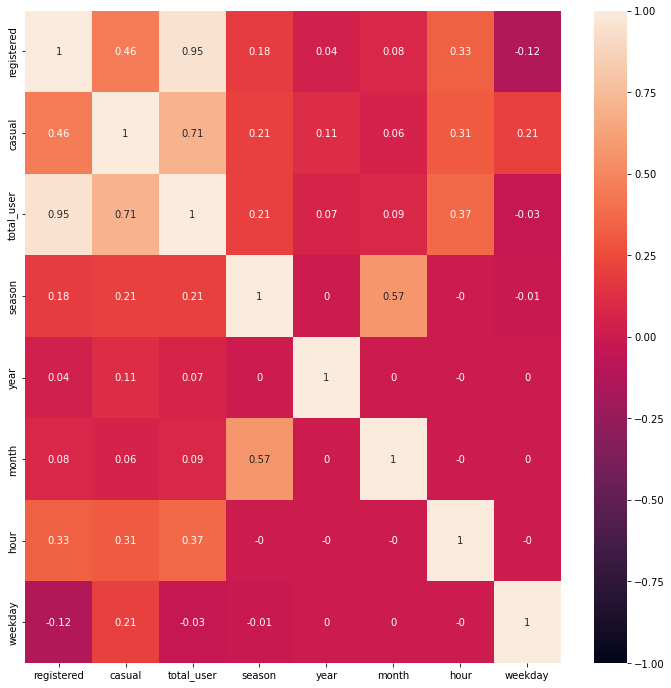

In [19]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(merge_user.corr().round(2), vmin=-1, vmax=1, annot = True)
plt.show()

In [20]:
merge_user.corr()

,registered,casual,total_user,season,year,month,hour,weekday
registered,1.000000,0.462853,0.954529,1.789200e-01,4.097106e-02,8.466295e-02,3.286559e-01,-1.225351e-01
casual,0.462853,1.000000,0.706069,2.086744e-01,1.114086e-01,6.207179e-02,3.076812e-01,2.116229e-01
total_user,0.954529,0.706069,1.000000,2.131128e-01,7.019840e-02,8.850983e-02,3.660288e-01,-2.671789e-02
season,0.178920,0.208674,0.213113,1.000000e+00,6.857499e-13,5.748679e-01,-2.257015e-16,-6.965407e-03
year,0.040971,0.111409,0.070198,6.857499e-13,1.000000e+00,7.564458e-13,-8.607154e-16,1.677356e-03
month,0.084663,0.062072,0.088510,5.748679e-01,7.564458e-13,1.000000e+00,-9.941899e-16,2.472226e-04
hour,0.328656,0.307681,0.366029,-2.257015e-16,-8.607154e-16,-9.941899e-16,1.000000e+00,-1.108522e-17
weekday,-0.122535,0.211623,-0.026718,-6.965407e-03,1.677356e-03,2.472226e-04,-1.108522e-17,1.000000e+00


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):

# VIF dataframe
	vif_data = pd.DataFrame()
	vif_data["feature"] = dataset.columns

# calculating VIF for each feature
	vif_data["VIF_value"] = [variance_inflation_factor(dataset.values, i) for i in range(len(dataset.columns))]		#or (dataset.shape[1])

	return(vif_data)

In [22]:
feature = merge_user.iloc[:,1:9] 
display(feature.head())
calculate_vif(feature)

,registered,casual,total_user,season,year,month,hour,weekday
0,43,11,54,1,2015,1,0,3
1,105,9,114,1,2015,1,1,3
2,95,5,100,1,2015,1,2,3
3,16,0,16,1,2015,1,3,3
4,8,0,8,1,2015,1,4,3


/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF_value
0,registered,inf
1,casual,inf
2,total_user,inf
3,season,9.585474
4,year,12.313013
5,month,6.878845
6,hour,4.407288
7,weekday,3.655096


In [23]:
X = merge_user.iloc[:,5:9] 
X

,year,month,hour,weekday
0,2015,1,0,3
1,2015,1,1,3
2,2015,1,2,3
3,2015,1,3,3
4,2015,1,4,3
...,...,...,...,...
26299,2017,12,19,6
26300,2017,12,20,6
26301,2017,12,21,6
26302,2017,12,22,6


In [24]:
X = merge_user.iloc[:,5:9] 
y = merge_user["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([230.6524973 , 608.84377575, 342.88435877, ..., 308.76748388,
       209.3614954 , 443.73049544])

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     798.4
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:40:09   Log-Likelihood:            -1.3403e+05
No. Observations:               18412   AIC:                         2.681e+05
Df Residuals:                   18407   BIC:                         2.681e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.6320      8.200     10.808      0.0

In [25]:
Accuracy=r2_score(Y_test,y_pred)
print("Accuracy of the model is %.2f" %Accuracy)
print("mean_sqrd_error is =",mean_squared_error(Y_test,y_pred))
print("root_mean_squared error is =",np.sqrt(mean_squared_error(Y_test,y_pred)))

Accuracy of the model is 0.15
mean_sqrd_error is = 121787.22141132817
root_mean_squared error is = 348.9802593433161


In [26]:
X_Onehotencode_season = merge_user.copy()

season_encoder = OneHotEncoder()
encoded_season = pd.DataFrame(season_encoder.fit_transform(merge_user[['season']]).toarray())
season_encoder.categories_
encoded_season.columns = ['winter', 'spring', 'summer', 'autumn']
X_Onehotencode_season = merge_user.join(encoded_season)
X_Onehotencode_season = X_Onehotencode_season.drop(["season"],axis=1)

X_Onehotencode_season

,date,registered,casual,total_user,year,month,hour,weekday,winter,spring,summer,autumn
0,2015-01-01 00:00:00,43,11,54,2015,1,0,3,1.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1,3,1.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,1,2,3,1.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,1,3,3,1.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,1,4,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,19,6,1.0,0.0,0.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,20,6,1.0,0.0,0.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,21,6,1.0,0.0,0.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,22,6,1.0,0.0,0.0,0.0


In [27]:
feature = X_Onehotencode_season.iloc[:,1:12]  
display(feature.head())
calculate_vif(feature)

,registered,casual,total_user,year,month,hour,weekday,winter,spring,summer,autumn
0,43,11,54,2015,1,0,3,1.0,0.0,0.0,0.0
1,105,9,114,2015,1,1,3,1.0,0.0,0.0,0.0
2,95,5,100,2015,1,2,3,1.0,0.0,0.0,0.0
3,16,0,16,2015,1,3,3,1.0,0.0,0.0,0.0
4,8,0,8,2015,1,4,3,1.0,0.0,0.0,0.0


/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF_value
0,registered,inf
1,casual,inf
2,total_user,inf
3,year,1.016634e+00
4,month,1.772810e+00
5,hour,1.183060e+00
6,weekday,1.126890e+00
7,winter,1.534006e+06
8,spring,1.562198e+06
9,summer,1.562147e+06


In [28]:
corr_season = X_Onehotencode_season.corr()[["total_user"]].sort_values(by = "total_user", ascending= False)
corr_season

,total_user
total_user,1.000000
registered,0.954529
casual,0.706069
hour,0.366029
summer,0.172013
month,0.088510
year,0.070198
autumn,0.060722
spring,0.021789
weekday,-0.026718


In [29]:
X = X_Onehotencode_season.iloc[:,5:12] 
X

,month,hour,weekday,winter,spring,summer,autumn
0,1,0,3,1.0,0.0,0.0,0.0
1,1,1,3,1.0,0.0,0.0,0.0
2,1,2,3,1.0,0.0,0.0,0.0
3,1,3,3,1.0,0.0,0.0,0.0
4,1,4,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
26299,12,19,6,1.0,0.0,0.0,0.0
26300,12,20,6,1.0,0.0,0.0,0.0
26301,12,21,6,1.0,0.0,0.0,0.0
26302,12,22,6,1.0,0.0,0.0,0.0


In [30]:
X = X_Onehotencode_season.iloc[:,5:12] 
y = merge_user["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([337.2823733 , 652.15600195, 350.54747617, ..., 440.33611741,
       243.47426116, 351.7517209 ])

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     820.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:40:09   Log-Likelihood:            -1.3333e+05
No. Observations:               18412   AIC:                         2.667e+05
Df Residuals:                   18405   BIC:                         2.667e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.3166      6.448     19.744      0.0

In [31]:
Accuracy=r2_score(Y_test,y_pred)
print("Accuracy of the model is %.2f" %Accuracy)
print("mean_sqrd_error is =",mean_squared_error(Y_test,y_pred))
print("root_mean_squared error is =",np.sqrt(mean_squared_error(Y_test,y_pred)))

Accuracy of the model is 0.21
mean_sqrd_error is = 113371.72177521541
root_mean_squared error is = 336.7071751169188


In [32]:
X_Onehotencode_season_w = X_Onehotencode_season.copy()
X_Onehotencode_season_w['weekday'] = X_Onehotencode_season_w['weekday'].apply(lambda value: 1 if value <=5 else 0)

display(X_Onehotencode_season, X_Onehotencode_season_w) 

,date,registered,casual,total_user,year,month,hour,weekday,winter,spring,summer,autumn
0,2015-01-01 00:00:00,43,11,54,2015,1,0,3,1.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1,3,1.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,1,2,3,1.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,1,3,3,1.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,1,4,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,19,6,1.0,0.0,0.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,20,6,1.0,0.0,0.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,21,6,1.0,0.0,0.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,22,6,1.0,0.0,0.0,0.0


,date,registered,casual,total_user,year,month,hour,weekday,winter,spring,summer,autumn
0,2015-01-01 00:00:00,43,11,54,2015,1,0,1,1.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1,1,1.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,1,2,1,1.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,1,3,1,1.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,1,4,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,19,0,1.0,0.0,0.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,20,0,1.0,0.0,0.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,21,0,1.0,0.0,0.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,22,0,1.0,0.0,0.0,0.0


In [33]:
X = X_Onehotencode_season_w.iloc[:,6:12] 
X

,hour,weekday,winter,spring,summer,autumn
0,0,1,1.0,0.0,0.0,0.0
1,1,1,1.0,0.0,0.0,0.0
2,2,1,1.0,0.0,0.0,0.0
3,3,1,1.0,0.0,0.0,0.0
4,4,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
26299,19,0,1.0,0.0,0.0,0.0
26300,20,0,1.0,0.0,0.0,0.0
26301,21,0,1.0,0.0,0.0,0.0
26302,22,0,1.0,0.0,0.0,0.0


In [34]:
X = X_Onehotencode_season_w.iloc[:,6:12] 
y = X_Onehotencode_season_w["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

13587    337.422685
6647     638.568297
20193    359.537200
10601    520.541774
24007    347.740893
            ...    
10955    399.788344
17289    173.532497
5192     438.050543
12172    227.727598
235      374.788215
Length: 18412, dtype: float64

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     984.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:40:09   Log-Likelihood:            -1.3333e+05
No. Observations:               18412   AIC:                         2.667e+05
Df Residuals:                   18406   BIC:                         2.667e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.9981      6.200     17.097      0.0

In [35]:
X_Onehotencode_weekday = X_Onehotencode_season_w.copy()

weekday_encoder = OneHotEncoder()
encoded_weekday = pd.DataFrame(weekday_encoder.fit_transform(X_Onehotencode_season_w[['weekday']]).toarray())
weekday_encoder.categories_
encoded_weekday.columns = ['weekdate', 'weekend']
X_Onehotencode_weekday = X_Onehotencode_season_w.join(encoded_weekday)
X_Onehotencode_weekday = X_Onehotencode_weekday.drop(["weekday"],axis=1)

X_Onehotencode_weekday

,date,registered,casual,total_user,year,month,hour,winter,spring,summer,autumn,weekdate,weekend
0,2015-01-01 00:00:00,43,11,54,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1,1.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,95,5,100,2015,1,2,1.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,16,0,16,2015,1,3,1.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,8,0,8,2015,1,4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,19,1.0,0.0,0.0,0.0,1.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,20,1.0,0.0,0.0,0.0,1.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,21,1.0,0.0,0.0,0.0,1.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,22,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X = X_Onehotencode_weekday.iloc[:,6:13] 
X

,hour,winter,spring,summer,autumn,weekdate,weekend
0,0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,0.0,0.0,0.0,0.0,1.0
3,3,1.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
26299,19,1.0,0.0,0.0,0.0,1.0,0.0
26300,20,1.0,0.0,0.0,0.0,1.0,0.0
26301,21,1.0,0.0,0.0,0.0,1.0,0.0
26302,22,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X = X_Onehotencode_weekday.iloc[:,6:13] 
y = X_Onehotencode_weekday["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

13587    337.422685
6647     638.568297
20193    359.537200
10601    520.541774
24007    347.740893
            ...    
10955    399.788344
17289    173.532497
5192     438.050543
12172    227.727598
235      374.788215
Length: 18412, dtype: float64

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     984.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:40:10   Log-Likelihood:            -1.3333e+05
No. Observations:               18412   AIC:                         2.667e+05
Df Residuals:                   18406   BIC:                         2.667e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.6220      3.112     27.192      0.0

In [55]:
X_Onehotencode_weekday_day_night = X_Onehotencode_weekday.copy()

X_Onehotencode_weekday_day_night['hour'] = X_Onehotencode_weekday_day_night['hour'].apply(lambda x: 0 if (x <=7 or x >= 19) else 1)

display(X_Onehotencode_weekday, X_Onehotencode_weekday_day_night.head(24)) 

,date,registered,casual,total_user,year,month,hour,winter,spring,summer,autumn,weekdate,weekend
0,2015-01-01 00:00:00,43,11,54,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1,1.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,95,5,100,2015,1,2,1.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,16,0,16,2015,1,3,1.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,8,0,8,2015,1,4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,19,1.0,0.0,0.0,0.0,1.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,20,1.0,0.0,0.0,0.0,1.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,21,1.0,0.0,0.0,0.0,1.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,22,1.0,0.0,0.0,0.0,1.0,0.0


,date,registered,casual,total_user,year,month,hour,winter,spring,summer,autumn,weekdate,weekend
0,2015-01-01 00:00:00,43,11,54,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,2015-01-01 01:00:00,105,9,114,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
2,2015-01-01 02:00:00,95,5,100,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
3,2015-01-01 03:00:00,16,0,16,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-01 04:00:00,8,0,8,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
5,2015-01-01 05:00:00,6,0,6,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
6,2015-01-01 06:00:00,4,3,7,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
7,2015-01-01 07:00:00,8,3,11,2015,1,0,1.0,0.0,0.0,0.0,0.0,1.0
8,2015-01-01 08:00:00,26,6,32,2015,1,1,1.0,0.0,0.0,0.0,0.0,1.0
9,2015-01-01 09:00:00,39,7,46,2015,1,1,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
X = X_Onehotencode_weekday_day_night.iloc[:,6:13] 
X

,hour,winter,spring,summer,autumn,weekdate,weekend
0,0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
26299,0,1.0,0.0,0.0,0.0,1.0,0.0
26300,0,1.0,0.0,0.0,0.0,1.0,0.0
26301,0,1.0,0.0,0.0,0.0,1.0,0.0
26302,0,1.0,0.0,0.0,0.0,1.0,0.0


In [110]:
X = X_Onehotencode_weekday_day_night.iloc[:,6:13] 
y = X_Onehotencode_weekday_day_night["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

13587    317.236809
6647     209.552460
20193    640.100846
10601    640.100846
24007    244.419989
            ...    
10955    640.100846
17289    451.404335
5192     737.587277
12172    184.882849
235       31.053867
Length: 18412, dtype: float64

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     2258.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:            -1.3110e+05
No. Observations:               18412   AIC:                         2.622e+05
Df Residuals:                   18406   BIC:                         2.623e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.1037      2.140     49.571      0.0

In [111]:
model.params

const       106.103712
hour        420.350468
winter     -145.535466
spring       43.161045
summer      140.647476
autumn       67.830656
weekdate     35.618091
weekend      70.485621
dtype: float64

In [79]:
X_Onehotencode_w_day_night = X_Onehotencode_weekday_day_night.copy()

day_night_encoder = OneHotEncoder()
encoded_day_night = pd.DataFrame(day_night_encoder.fit_transform(X_Onehotencode_weekday_day_night[['hour']]).toarray())
day_night_encoder.categories_
encoded_day_night.columns = ['night', 'day']
X_Onehotencode_w_day_night = X_Onehotencode_weekday_day_night.join(encoded_day_night)
X_Onehotencode_w_day_night = X_Onehotencode_w_day_night.drop(["hour"],axis=1)

X_Onehotencode_w_day_night

,date,registered,casual,total_user,year,month,winter,spring,summer,autumn,weekdate,weekend,night,day
0,2015-01-01 00:00:00,43,11,54,2015,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26300,2017-12-31 20:00:00,30,0,30,2017,12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26301,2017-12-31 21:00:00,44,2,46,2017,12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26302,2017-12-31 22:00:00,21,4,25,2017,12,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [88]:
X = X_Onehotencode_w_day_night.iloc[:,6:15]
X

,winter,spring,summer,autumn,weekdate,weekend,night,day
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
26299,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26300,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26301,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26302,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [104]:
X = X_Onehotencode_w_day_night.iloc[:,6:15]
y = X_Onehotencode_w_day_night["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

13587    317.236809
6647     209.552460
20193    640.100846
10601    640.100846
24007    244.419989
            ...    
10955    640.100846
17289    451.404335
5192     737.587277
12172    184.882849
235       31.053867
Length: 18412, dtype: float64

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     2258.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:03:02   Log-Likelihood:            -1.3110e+05
No. Observations:               18412   AIC:                         2.622e+05
Df Residuals:                   18406   BIC:                         2.623e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.9363      1.398    125.822      0.0

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_model = PolynomialFeatures(degree = 7)

# transform out polynomial features
poly_X = poly_model.fit_transform(X_train)

# let's fit the model
poly_model.fit(poly_X, Y_train)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_X, Y_train)

LinearRegression()

In [106]:
x = sm.add_constant(poly_X) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([287.90625, 138.5    , 651.625  , ..., 756.3125 , 122.84375,
       101.     ])

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     807.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:08:31   Log-Likelihood:            -1.3085e+05
No. Observations:               18412   AIC:                         2.617e+05
Df Residuals:                   18396   BIC:                         2.619e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.372e+14   8.47e+13     -2.800      0.0

In [109]:
model.params

const   -2.372235e+14
x1      -7.866654e+13
x2      -9.452722e+13
x3      -1.336207e+14
x4      -1.547528e+14
             ...     
x6430    0.000000e+00
x6431    0.000000e+00
x6432    0.000000e+00
x6433    0.000000e+00
x6434    2.596576e+12
Length: 6435, dtype: float64

In [ ]:
X_Onehotencode_s_month = X_Onehotencode_season.copy()

month_encoder = OneHotEncoder()
encoded_month = pd.DataFrame(month_encoder.fit_transform(merge_user[['month']]).toarray())
month_encoder.categories_
encoded_month.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_Onehotencode_s_month = X_Onehotencode_season.join(encoded_month)
X_Onehotencode_s_month = X_Onehotencode_s_month.drop(["month"],axis=1)

X_Onehotencode_s_month

,date,registered,casual,total_user,year,hour,weekday,winter,spring,summer,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2015-01-01 00:00:00,43,11,54,2015,0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,2,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,3,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,4,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,19,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26300,2017-12-31 20:00:00,30,0,30,2017,20,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26301,2017-12-31 21:00:00,44,2,46,2017,21,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26302,2017-12-31 22:00:00,21,4,25,2017,22,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_Onehotencode_s_month.iloc[:,1:24] 

,registered,casual,total_user,year,hour,weekday,winter,spring,summer,autumn,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,43,11,54,2015,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105,9,114,2015,1,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95,5,100,2015,2,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,0,16,2015,3,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0,8,2015,4,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,55,4,59,2017,19,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26300,30,0,30,2017,20,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26301,44,2,46,2017,21,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26302,21,4,25,2017,22,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
feature = X_Onehotencode_s_month.drop("date", axis=1)  
display(feature.head())
calculate_vif(feature)

,registered,casual,total_user,year,hour,weekday,winter,spring,summer,autumn,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,43,11,54,2015,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105,9,114,2015,1,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95,5,100,2015,2,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,0,16,2015,3,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0,8,2015,4,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF_value
0,registered,inf
1,casual,inf
2,total_user,inf
3,year,1.017160
4,hour,1.187724
5,weekday,1.127859
6,winter,inf
7,spring,inf
8,summer,inf
9,autumn,inf


In [ ]:
corr_s_month = X_Onehotencode_s_month.corr()[["total_user"]].sort_values(by = "total_user", ascending= False)
corr_s_month

,total_user
total_user,1.000000
registered,0.954529
casual,0.706069
hour,0.366029
summer,0.172013
Jul,0.092051
Aug,0.090621
Jun,0.086544
Sep,0.080223
year,0.070198


In [ ]:
X = X_Onehotencode_s_month.iloc[:,5:24]  
y = merge_user["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
#norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
#X_train = norm.transform(X_train)
# transform testing data
#X_test = norm.transform(X_test)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([335.73906406, 680.19149981, 392.10850748, ..., 446.02714639,
       282.25135969, 337.18127716])

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     408.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:14:50   Log-Likelihood:            -1.3317e+05
No. Observations:               18412   AIC:                         2.664e+05
Df Residuals:                   18398   BIC:                         2.665e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.8706      4.547     28.564      0.0

In [ ]:
Accuracy=r2_score(Y_test,y_pred)
print("Accuracy of the model is %.2f" %Accuracy)
print("mean_sqrd_error is =",mean_squared_error(Y_test,y_pred))
print("root_mean_squared error is =",np.sqrt(mean_squared_error(Y_test,y_pred)))

Accuracy of the model is 0.22
mean_sqrd_error is = 111095.44047769894
root_mean_squared error is = 333.3098265543621


In [ ]:
day_encoder = OneHotEncoder()
encoded_day = pd.DataFrame(day_encoder.fit_transform(merge_user[['weekday']]).toarray())
day_encoder.categories_
encoded_day.columns = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
X_Onehotencode_s_m_day = X_Onehotencode_s_month.join(encoded_day)
X_Onehotencode_s_m_day = X_Onehotencode_s_m_day.drop(["weekday"],axis=1)

X_Onehotencode_s_m_day

,date,registered,casual,total_user,year,hour,winter,spring,summer,autumn,...,Oct,Nov,Dec,mon,tue,wed,thur,fri,sat,sun
0,2015-01-01 00:00:00,43,11,54,2015,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,105,9,114,2015,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,95,5,100,2015,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2015-01-01 03:00:00,16,0,16,2015,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2015-01-01 04:00:00,8,0,8,2015,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2017-12-31 19:00:00,55,4,59,2017,19,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26300,2017-12-31 20:00:00,30,0,30,2017,20,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26301,2017-12-31 21:00:00,44,2,46,2017,21,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26302,2017-12-31 22:00:00,21,4,25,2017,22,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
feature = X_Onehotencode_s_m_day.drop(columns= {"date","registered","casual","year"})  
display(feature.head())
calculate_vif(feature)

,total_user,hour,winter,spring,summer,autumn,Jan,Feb,Mar,Apr,...,Oct,Nov,Dec,mon,tue,wed,thur,fri,sat,sun
0,54,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,114,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF_value
0,total_user,1.290259
1,hour,1.172865
2,winter,inf
3,spring,inf
4,summer,inf
5,autumn,inf
6,Jan,inf
7,Feb,inf
8,Mar,inf
9,Apr,inf


In [ ]:
corr_s_month = X_Onehotencode_s_m_day.corr()[["total_user"]].sort_values(by = "total_user", ascending= False)
corr_s_month

,total_user
total_user,1.000000
registered,0.954529
casual,0.706069
hour,0.366029
summer,0.172013
Jul,0.092051
Aug,0.090621
Jun,0.086544
Sep,0.080223
year,0.070198


In [ ]:
X_Onehotencode_s_m_day.iloc[:,5:32] 

,hour,winter,spring,summer,autumn,Jan,Feb,Mar,Apr,May,...,Oct,Nov,Dec,mon,tue,wed,thur,fri,sat,sun
0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26300,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26301,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26302,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = X_Onehotencode_s_m_day.iloc[:,5:32]  
y = X_Onehotencode_s_m_day["total_user"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

y_pred=linreg.predict(X_test)
y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([360.24327861, 667.79110521, 408.54971735, ..., 469.98553198,
       269.75562684, 323.75870617])

                            OLS Regression Results                            
Dep. Variable:             total_user   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     297.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:14:51   Log-Likelihood:            -1.3315e+05
No. Observations:               18412   AIC:                         2.663e+05
Df Residuals:                   18393   BIC:                         2.665e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8493      3.243     33.260      0.0

In [ ]:
hour = pd.read_csv("hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


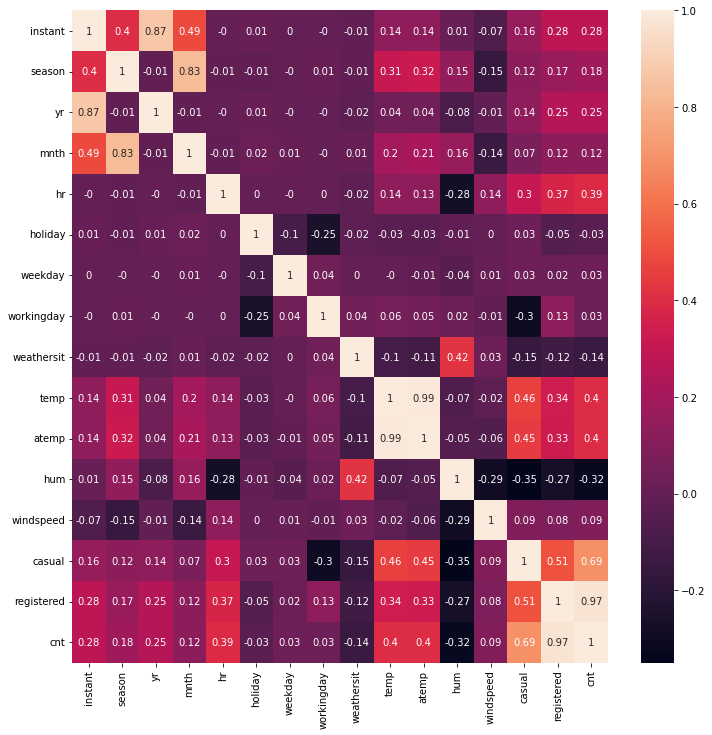

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(hour.corr().round(2), annot = True)
plt.show()

In [ ]:
total_hr = hour.groupby(["hr", "season"]).sum()[["cnt","registered","casual"]].reset_index()
total_hl = hour.groupby(["hr", "holiday"]).sum()[["cnt","registered","casual"]].reset_index()
display (total_hr, total_hl)

,hr,season,cnt,registered,casual
0,0,1,4878,4274,604
1,0,2,10459,8177,2282
2,0,3,13822,10729,3093
3,0,4,9971,8575,1396
4,1,1,3229,2813,416
...,...,...,...,...,...
91,22,4,21871,19169,2702
92,23,1,7994,7180,814
93,23,2,17661,14080,3581
94,23,3,22986,18247,4739


,hr,holiday,cnt,registered,casual
0,0,0,37923,30852,7071
1,0,1,1207,903,304
2,1,0,23347,18829,4518
3,1,1,817,626,191
4,2,0,15817,12570,3247
5,2,1,535,370,165
6,3,0,7965,6131,1834
7,3,1,209,150,59
8,4,0,4311,3473,838
9,4,1,117,81,36


In [ ]:
X = total_hr.iloc[:,:2] 
y = total_hr["cnt"]

display(X,y)

,hr,season
0,0,1
1,0,2
2,0,3
3,0,4
4,1,1
...,...,...
91,22,4
92,23,1
93,23,2
94,23,3


0      4878
1     10459
2     13822
3      9971
4      3229
      ...  
91    21871
92     7994
93    17661
94    22986
95    15300
Name: cnt, Length: 96, dtype: int64

In [ ]:
X = total_hr.iloc[:,:2] 
y = total_hr["cnt"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

linreg= linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

#y_pred=linreg.predict(X_test)
#y_pred

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, x).fit()
predictions = model.predict(x) 

display(predictions)
 
print_model = model.summary()
print(print_model)

array([51959.2070347 , 45481.14564999, 19721.98287386, 29747.93966251,
       34066.64725232, 28206.31529074, 28977.12747662, 54889.37301549,
       46251.95783587, 47793.58220763, 23887.60770093, 53500.83140647,
       27588.5858676 , 62755.97600923, 24658.41988681, 61367.43440021,
       39003.08426527, 42704.06243194,  2447.15251462, 28359.39805348,
       31907.29345741, 16791.81689307, 60596.62221432, 17409.54631621,
       48411.31163077, 26817.77368172, 44863.41622685, 33295.83506644,
       41162.43806017, 43321.79185508, 55660.18520137, 13243.92148915,
        4606.50630952, 14632.46309817, 32678.1056433 ,   287.79871971,
       57048.7268104 , 36226.00104722, 22499.06609191, 38385.35484213,
       49799.8532398 , 19568.90011112, 49952.93600254, 12473.10930326,
       36996.81323311, 49182.12381666, 18180.3585021 , 21110.52448288,
       15403.27528405, 21728.25390602, 20339.712297  , 11084.56769424,
       37614.54265625, 18951.17068798, 13861.65091229, 54118.56082961,
      

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     21.68
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           6.47e-08
Time:                        15:14:53   Log-Likelihood:                -760.17
No. Observations:                  67   AIC:                             1526.
Df Residuals:                      64   BIC:                             1533.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.7987   5629.501      0.051      0.9